# **AP155 Lab Assignment** 
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 5 are worth 20, 20, 10, 30, and 20 points, respectively).

_Due Date_: **5PM of November 3 (Thu)**



### Student Information 

_Full Name (Last Name, First Name)_: Jonabel Eleanor B. Baldres \
_Student No._: 2020-07279 \
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: 27 November 2022 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** sgd. Jonabel Eleanor Baldres

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/20
* Problem 2 - XX/20
* Problem 3 - XX/10
* Problem 4 - XX/30
* Problem 5 - XX/20

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

In [972]:
# importing all necessary functions in the problems
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sin, sqrt, tanh, cosh, inf


### PROBLEM 1 (20 pts.) 
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. What are the percentage errors of your answers in (1)? *(2 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.;  4 pts. for the code & 4 pts. for the discussion text)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(2 pts.)*

In [973]:
def f(x):
  ''' defining the function provided that needs to be integrated'''
  return 2*x**4 + 3*x**2 + 4*x + 5

In [974]:
def int_f(x):
  ''' defining the integral of the function '''
  return 2*x**5/5 + x**3 + 2*x**2 + 5*x


In [975]:
print("The actual value of the integral is " + str(int_f(5))) 
#since the value of the function is 0 when x = 0, the author decided to just find the integral when x = 5
# this will be used in obtaining the percentage errors in the next steps

The actual value of the integral is 1450.0


Using the **Trapezoidal Rule** \

Here, we created a function trapezoidal to calculate the integral of the given function. We create an argument *N* which is the variable for the number of steps needed in the numerical calculation using the Trapezoidal Rule. Note that the Trapezoidal rule is given by the equation
\begin{align}
        I(a,b) = h \left[ \frac{1}{2} f(a) + \frac{1}{2} f(b) + \sum_{k=1}^{N-1} f(a+kh) \right]
    \end{align}
where h is the width of the slices, a is the lower limit of integration, b is the upper limit of integration, k is the position of slice, and $f(n)$ is the function integrated. 

In [976]:
a = 0 # lower limit of integration
b = 5 # upper limit of integration

def trapezoidal(N):
  ''' this function provides the integral using the trapezoidal method'''
  h = (b-a)/N # width of the slices 
  s = 0.5*f(a) + 0.5*f(b) 

  for k in range(1,N): 
    s+= f(a+k*h) # this adds a value to the variable s and the new value becomes the value of s
  return h*s # returning h*s means the functions shows the product of s with h that results to the integral of the given function given N

In [977]:
for i in [10,100,1000]: # used for loop to yield the integral of the function when N= 10,100, and 1000
  print("When N=" + str(i) +  ",the integral is " + str(trapezoidal(i)))

When N=10,the integral is 1471.4375
When N=100,the integral is 1450.2145812500003
When N=1000,the integral is 1450.0021458331234


In [978]:
def trapezoidal_error(N):
  '''calculates the numerical error produced by the trapezoidal rule method'''
  return (trapezoidal(N) - int_f(5)) / int_f(5) * 100

In [979]:
for k in [10,100,1000]: # shows the error when the integral has N number of steps
  print("The error when the integral has " + str(k) + " steps is " + str(trapezoidal_error(k)) )

The error when the integral has 10 steps is 1.478448275862069
The error when the integral has 100 steps is 0.014798706896569988
The error when the integral has 1000 steps is 0.00014798849127240326


Using the **Simpsons Rule** \
In this problem, we define the function simpsons with argument N for the number of slices to produce the integral of a given function. We note that the Simpson's rule is given by the equation:
\begin{align}
        \frac{1}{3} h \left[ f(a) + f(b) + 4 \sum_{k \ odd} f(a+kh) + 2 \sum_{k \ even} f(a+kh) \right]
    \end{align}
where h is the width of the slices, a and b is the lower and upper limit of integration respectively, k is the position of the slice, and *f(n)* is the function

In [980]:
#using the same lower and upper integration bounds a and b

def simpsons(N):
  ''' the function is used to create the code for the Simpson's Rule'''
  h = (b-a) / N # width of the slice
  c = h/3 
  s = f(a) + f(b) # first two equation that needs to be added together

  for k in range(2,N,2): # when the position of the slice is even, we add the equation below to the initial value of s and the sum becomes the new s
    s += 2 * f(a+k*h)

  for k in range(1,N,2): # when the position of the slice is odd, we add the equation below to the initial value of s and the sum becomes the new s
    s += 4 * f(a+k*h) 

  return c*s #calling the function returns the product of c and s which is the value of the integral using the Simpson's rule


In [981]:
for k in [10,100,1000]: # used for loop to yield the integral of the function when N= 10,100, and 1000
  print("When N=" + str(k) +  ",the integral is " + str(simpsons(k)))

When N=10,the integral is 1450.0833333333333
When N=100,the integral is 1450.0000083333334
When N=1000,the integral is 1450.0000000008336


In [982]:
def simpsons_error(N): # returns the value of the percentage error when Simpsons rule is used
  return (simpsons(N) - int_f(5)) / int_f(5) * 100

In [983]:
for l in [10,100,1000]:
  print("The error when the integral has " + str(l) + " steps is " + str(simpsons_error(l)) )

The error when the integral has 10 steps is 0.005747126436776382
The error when the integral has 100 steps is 5.747126500676226e-07
The error when the integral has 1000 steps is 5.748633752930267e-11


In summary, the percentage errors when Simpsons Rule was used were smaller compared to Trapezoidal rule. This means that Simpsons Rule produces more accurate integral value than Trapezoidal rule. 

### PROBLEM 2 (20 pts.)

**Integration using the adaptive trapezoidal rule method and Romberg integration**

Calculate the integral $ I = \int_0^1 \sin^2 \sqrt{100x} \mbox{d}x $.

1. Do the numerical calculation using the adaptive trapezoidal rule method to an approximate accuracy of $\epsilon = 10^{-6}$. Start with one single integration slice and work up from there to two, four, eight, and so forth. Save and print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. Repeat the calculation using the Romberg integration technique. Save and print out the same variables as in (1). *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

3. Compare the results from both calculations by creating a plot of error estimates vs. $N$. Annotate your chart completely (include proper axis labels and legend). Describe how the trends for the two techniques compare. *(4 pts.; 2 pts. for the chart & 2 pts. for the discussion text)*

In [984]:
a = 0 # lower integration bound
b =1 #upper integration bound
data = [] # to store the values 

Using the **Adaptive Trapezoidal Method** \
Here, we take note of the following equation

\begin{align}
    I_i = \frac{1}{2} I_{i - 1} + h_i \sum_{k \ odd} f(a+kh_i)
  \end{align}

which is the adaptive trapezoidal method where $I_i$ is integral of the ith step of the calculation, $h_i$ is the width of the slice, and $k$ is the position of the slice. 

In [985]:
def g(x):
  '''returns the function'''
  return (sin(10*sqrt(x)) ** 2)

def integrate(function, N):
  h = (b-a)/N # width of the slice
  s = 0 #starting point
  for i in range(1,N,2): #when i is odd, we add the equation below to the initial value of s and the sum becomes the new s
    s += function(a+i*h) 

  return s * h #calling the function returns the product of s and h

def adaptive_trapezoidal(function):
  N= 1 #starting number of slice
  initial = 0 # initial value of integral
  h = (b-a) / N
  final = h * (function(a) + function(b)) 
  error= abs(final - initial)/3 #calculates the error 

  while error > 1.e-6: #while error > 1.e-6, the program continues printing the integral until the desired value of error is achieved
    initial = final
    final = (0.5 * initial) + integrate(function, N)
    error = abs(final - initial)/3
    N*= 2 # doubles the number of steps 
    data.append([N/2, error, final]) #adds the value of final, error, and N/2 to the list to store the value

  return data

data = adaptive_trapezoidal(g)

The table below shows the number of slices (4096) it takes to approach the desired accuracy and the value of its integral.  From the program, it stated it took 1 second to fully show the output. 

In [986]:
df = pd.DataFrame(data, columns =['Number of slices', 'Error', 'Value of Integral'])
df.index += 1
df

,Number of slices,Error,Value of Integral
1,1.0,4.932649e-02,0.147979
2,2.0,5.908414e-02,0.325232
3,4.0,6.235031e-02,0.512283
4,8.0,3.642847e-02,0.402997
5,16.0,9.035307e-03,0.430103
6,32.0,6.103765e-03,0.448415
7,64.0,1.832755e-03,0.453913
8,128.0,4.785244e-04,0.455349
9,256.0,1.209207e-04,0.455711
10,512.0,3.031107e-05,0.455802


Using the **Romberg Integration** \
The Romberg integration is given by the formula

\begin{align}
   I = R_{i,m+1} + \text{error}
  \end{align}
where
\begin{align}
   R_{i,m+1} = R_{i,m} + \frac{1}{4^m -1 } (R_{i,m} - R_{i-1,m})
  \end{align}
and
\begin{align}
  \text{error} = \frac{1}{4^m -1} (R_{i,m} - R_{i-1,m})
  \end{align}

In [987]:
#adding important constants
N = 1 # initial number of slice
a = 0 #lower integration limit
b = 1 # upper intergration limit
h = (b-a)/N #width of slice
error = 10**(-6) #approximate accuracy
err = [inf] #list for creating the errors until desired approximate error is reached
slices = [] #list for storing the number of slices required to reach the desired integral given error

In [988]:
#defining all the needed functions
def TrapI(N):
    '''trapezoidal rule that will be used for romberg integration'''
    h = (b-a)/N
    s = 0.5*g(a) + 0.5*g(b)
    
    for k in range(1,N):
        s += g(a+k*h)
    return(h*s)

I1 = 0
I2 = TrapI(N)

while abs(1/3*(I2-I1)) > error: #continues the assigning of new values of I1 and I2 until it reaches the accuracy needed
    h_i = (b-a)/N
    I1 = I2
    I2 = 1/2*I1
    for k in range(1,N,2):
        I2 += h_i*g(a+k*h_i)
    N = 2*N

def Romberg():
    '''Romberg integration with no argument needed'''
    size = 7
    R = np.zeros((size,size))

    for i in range(0,size):
        N = 2**i
        slices.append(N)
        R[i,0] = TrapI(N) # using the trapezoidal function above to calculate R[i,0]
        for k in range(0,i): 
            m = k + 2
            R[i,k+1] = 1.0/(4**(m-1)-1)*(4**(m-1)*R[i,k] - R[i-1,k]) #calculating the next trapezoidal estimate
        if (i > 0):
          if (np.inf >= error):
            err.append(abs(R[i,k+1] - R[i,k]))

    return R, err, slices #return the value R, err, and slices

R, err, slices = Romberg() # assigns the value of Romberg into R, err, and slices

In [989]:
values = [] #list for the R[i,i] values which is the final integration per step
for i in range(7):
  values.append(R[i,i])

In [990]:
df = pd.DataFrame(
    {'Number of slices': slices,
     'Error': err,
     'Value of the integral': values
    })
df.index += 1
df #displays the integral given the number of slices and its error

,Number of slices,Error,Value of the integral
1,1,inf,0.147979
2,2,5.908414e-02,0.384316
3,4,1.268781e-02,0.587321
4,8,3.724174e-03,0.348974
5,16,3.782418e-04,0.445804
6,32,9.739968e-06,0.455777
7,64,1.342828e-08,0.455832


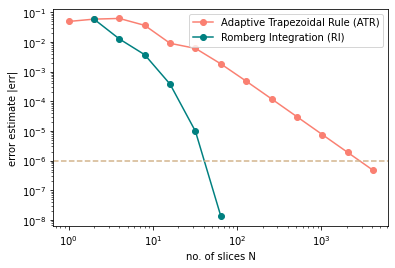

In [991]:
#plotting the values 
x = []
y = []
for i in range(0,len(data)):
     x.append(data[i][0])

for i in range(0,len(data)):
     y.append(data[i][1])

fig, ax = plt.subplots()
adtrap = ax.plot(x,y,'salmon', marker='o', label='Adaptive Trapezoidal Rule (ATR)')
romberg = ax.plot(slices, err, 'teal', marker='o',label='Romberg Integration (RI)')
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("no. of slices N")
ax.set_ylabel("error estimate |err|")
ax.axhline([10**(-6)], color = 'tan', linestyle = '--')

Looking at the graph below, we can say that ATR uses more number of steps to achieve the required accuracy than RI. Making RI more efficient when greater accuracy is required since it takes less time for the computer to compute.

### PROBLEM 3 (10 pts.)

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(2 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

In [992]:
#copying the gaussxw function straight from the book 
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w


def gaussxwab(N,a,b):
  x,w = gaussxw(N)
  return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
  

In [993]:
N = 3 # number of slices
a = 0 #lower limit integration
b = 5 #upper limit integration

#calculating the sample points and weights 
x, w = gaussxw(N) #assigning gaussxw(N) values as x and w
xp = 0.5 * (b-a) * x + 0.5 * (b+a) 
wp = 0.5 * (b-a) * w 

# Performing the integration
s = 0.0
for k in range(N):
  s += wp[k] * f(xp[k]) #using f(x) from the first problem

print("Using the gaussxw function, the integral is" , s)

Using the gaussxw function, the integral is 1450.000000000002


### PROBLEM 4 (30 pts.)

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(16 pts.; 8 pts. for the code & 8 pts. for the discussion text)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(14 pts.; 7 pts. for the plot & 7 pts. for the discussion text)*

In [994]:
def gquadrature(function,a, b): # calculates position and weights and does the mapping 

    xp, wp = gaussxwab(N,a,b)

    s = 0.0

    for k in range(N):
        s += wp[k]*function(xp[k])

    return s


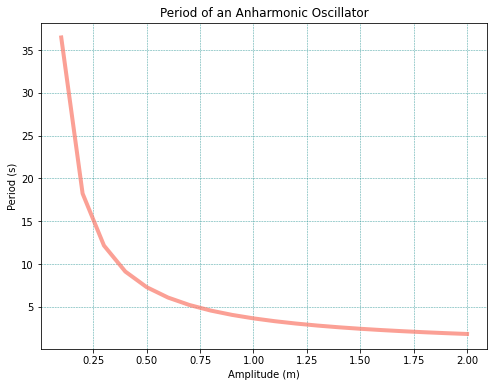

In [995]:
#4
m = 1 #mass of the particle
N = 20 #number of points
a = 0 # initial position
amplitude = linspace(0.1,2,N) # start, stop, number of samples to generate

def k(x): #The function for period T V(a) equal to the amplitude raised to 4
  return sqrt(8*m) / sqrt(amp**4 - x**4)

S = [] #list to store the period of the oscillator given amplitude
for amp in amplitude:
  S.append(gquadrature(k,a,amp)) #adds the period of the oscillator to the list S

#plotting the graph 
plt.figure(figsize=(8,6))
plt.title("Period of an Anharmonic Oscillator")
plt.xlabel("Amplitude (m)")
plt.ylabel("Period (s)")
plt.plot(amplitude,S, 'salmon', linewidth = '4', alpha = 0.75)
plt.grid(color = 'teal', linestyle = '--', linewidth = 0.5, alpha = 0.75)
plt.show()



From the graph, we can see that as the amplitude increases from 0 to 2, the period exponentially decreases. 

### PROBLEM 5 (20 pts.)

**Differentiation using central difference**

1. Calculate the derivative of the function $1 + \frac{1}{2} \tanh 2x$ in the range $-2 \le x \le 2$ using central difference. Describe each step of the calculation clearly and concisely. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

2. Calculate an analytic formula for the derivative and make a graph with your numerical result and the analytic answer on the same plot. Plot the exact answer as lines and the numerical one as dots. Describe how the two results compare. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

The **Central Difference** is given by the equation 
\begin{align}
  \frac{df}{dx} \simeq \frac{f(x+h/2)- f(x-h/2)}{h}
  \end{align}

In [996]:

h = 0.000000000001 # approximation that approaches 0
def func(x):
  '''the function given in the problem'''
  return 1 + 0.5 * tanh(2*x) 

def CentralDif(f,x,h):
  '''the function for calculating the derivative using the central difference'''
  derivative = (f(x+h) - f(x-h))/ (2 * h) #function for the central difference as shown above
  return derivative
  
calculated_answers = [] #stores the calculated derivative using central difference in the range -2 to 2 with step 1
for i in range(-2,3,1): #appends the derivative of the function in the list 
  calculated_answers.append(CentralDif(func,i,h))

In [997]:
def deriv_m(x): 
  ''' produces the actual value of the derivative'''
  return ((1/ cosh(2*x)) **  2 )

exact_answers = [] # stores the exact derivative in the range -2 to 2 with step 1
for i in range(-2,3,1):
  exact_answers.append(deriv_m(i))

In [998]:
errors = [] # stores the percent error between the actual and calculated derivatives
for i in range(0,5):
  error = abs((exact_answers[i] - calculated_answers[i]) / exact_answers[i]) * 100
  errors.append(error) 

In [999]:
df = pd.DataFrame(
    {'Actual value': exact_answers,
     'Calculated value' : calculated_answers,
     'Error': errors
    })
df.index += 1
df #displays the integral given the number of slices and its error

,Actual value,Calculated value,Error
1,0.001341,0.001332,0.647530
2,0.070651,0.070610,0.057523
3,1.000000,1.000033,0.003339
4,0.070651,0.070610,0.057523
5,0.001341,0.001332,0.647530


Text(0, 0.5, 'derivatives')

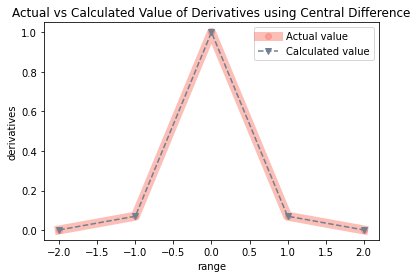

In [1000]:
x = [-2, -1, 0, 1, 2]

fig, ax = plt.subplots()
ax.plot(x,exact_answers, color = 'salmon', marker = 'o' ,linewidth = 9, alpha = 0.5, label = 'Actual value')
ax.plot(x,calculated_answers, '--', color = 'slategray', marker ='v', alpha = 1, label = 'Calculated value')
ax.legend()
ax.set_title("Actual vs Calculated Value of Derivatives using Central Difference")
ax.set_xlabel('range')
ax.set_ylabel('derivatives')

Comparing the two results from the graph, we can see that the two are almost the same as seen also from their percent error. 